# Линейная регрессия
$$a(x) = w_0 + w_1 x_1 + ... + w_d x_d$$
- $w_0$ - свободный коэффициент, сдвиг, bias. Без свободного коэффициента модель гарантированно будет давать нулевой прогноз при нулевых значениях всех признаков, а это ограничивает возможности по подгонке под данные


- $w_i$ - веса, коэффициенты, параметры модели
- $d+1$ - количество параметров

$$a(x) = w_0 + w_1 x_1 + ... + w_d x_d = w_0 + <w,x>$$

Для удобства и возможности применять скалярное произведения добавим единичный признак:

$$a(x) = w_0 * 1 + w_1 x_1 + ... + w_d x_d = <w,x>$$

### Пример
$$a(x) = w_0 + w_1 (площадь \_ квартиры) + w_2 (район) + w_3 (расстояние \_ до \_ метро)$$
#### Что делать, если признаки не числовые (район)?
- район - категориальный признак, нужно закодировать.
- one-hot кодирование, бинарное кодирование
- Вместо одного категориального признака заведём много бинарных. Первый признак - это индикатор того, что исходный категориальный признак равен первой категории, второй признак - равенство второй категории. Это значит, что только один бинарный признак будет равен единице, остальные - нули. 
| Район | 
| --- | 
|Чкаловский|
|Эльмаш|
|Уралмаш|
|Эльмаш|
|Чкаловский|

| Чкаловский | Эльмаш | Уралмаш |
| --- | --- | --- |
|1|0|0|
|0|1|0|
|0|0|1|
|0|1|0|
|1|0|0|


$$a(x) = w_0 + w_1 (площадь) + w_2 (квартира \ находится\ в\ Чкаловском\ р-не?) + w_3 (квартира \ находится\ на\ Эльмаше?) + w_4 (квартира \ находится\ на\ Уралмаше?) $$



#### Что делать, если зависимость нелинейная (расстояние до метро)?
<img src = 'images/underground.png'>
Разобьем на линейные отрезки (новые признаки).
Если расстояние до метро попало в интервал от $t_0$ до $t_1$, то признак равен 1. Остальные признаки попадания в интервал равны 0.

$$a(x) = w_0 + w_1 *(площадь) + ... + w_3 * [t_0 <= x_3 < t_1] + ... + w_{3+n}[t_{n-1} <= x_3 < t_n]$$

Модель линейной регрессии применима, если трансформировать все признаки специально под неё, например, использовать one-hot кодирование категориальных признаков или бинаризацию числовых

## Модель линейной регрессии
$$a(x) = <w, x>$$

Запишем задачу оптимизации в матричном виде:


__Матрица объекты-признаки:__
$$\begin{pmatrix} x_{11} & x_{12} & \dots & x_{1d} \\ x_{21} & x_{22} & \dots & x_{2d} \\ \dots & \dots & \dots & \dots \\ x_{l1} & x_{l2} & \dots & x_{ld} \end{pmatrix}$$
Каждая строка соответствует объекту, столбцы - признаки. 

$$\begin{pmatrix} w_1 \\ w_2 \\ \dots \\ w_d \end{pmatrix}$$
__Применение линейной модели:__
$$a(x) = <w, x> = w_1 x_1 + \dots + w_d x_d$$

__Нужно получить вектор прогнозов на всей обучающей выборке:__
$$\begin{pmatrix} \sum _{i=1} ^ d w_i x_{1i} \\ \sum _{i=1} ^ d w_i x_{2i} \\ \dots \\ \sum _{i=1} ^ d w_i x_{li} \end{pmatrix}$$
Первая строка - сумма всех признаков первого объекта с весами.

__Матричное умножение:__
$$AB=C$$
$$c_{ij} = \sum_{p=1}^{k} a_{ip}b_{pj}$$
_Скалярное умножение i-строки первой матрицы на j-столбец второй матрицы_

__Результат применения линейной модели к выборке X:__
$$Xw=\begin{pmatrix} x_{11} & x_{12} & \dots & x_{1d} \\ x_{21} & x_{22} & \dots & x_{2d} \\ \dots & \dots & \dots & \dots \\ x_{l1} & x_{l2} & \dots & x_{ld} \end{pmatrix} * \begin{pmatrix} w_1 \\ w_2 \\ \dots \\ w_d \end{pmatrix}=\begin{pmatrix} \sum _{i=1} ^ d w_i x_{1i} \\ \sum _{i=1} ^ d w_i x_{2i} \\ \dots \\ \sum _{i=1} ^ d w_i x_{li} \end{pmatrix}=\begin{pmatrix} <w, x_1> \\ \dots \\ <w,x_l>\end{pmatrix}$$

__Cреднеквадратическая ошибка:__
$$\displaystyle {\frac{1}{l} \sum _{i=1}^{l}{(<w,x_i> - y_i)^2 -> min_w}}$$
__Отклонения прогнозов от ответов:__
$$Xw-y=\begin{pmatrix} <w, x_1> - y_1 \\ \dots \\ <w,x_l> - y_l\end{pmatrix}$$
$Xw$ - прогнозы

$y$ - истинные ответы

__Средний квадрат отклонения:__


Евклидова норма:
$$||z|| = \sqrt {\sum _{j=1} ^ n z_{j}^2}$$
Можно возвести в квадрат:
$$||z||^2 = \sum _{j=1} ^ n z_{j}^2$$

__MSE в матричном виде:__
$$\displaystyle {\frac{1}{l} ||Xw-y||^2 = \frac{1}{l} \sum _{i=1}^{l}{(<w,x_i> - y_i)^2 -> min_w}}$$

_Умножаем матрицу объекты-признаки $X$ на $w$, вычитаем истинные ответы $y$, берем квадрат евклидовой нормы и делим на $l$_

_В numpy: np.square(X.dot(w)-y).mean()_

- Берём объект $x_i$, считаем прогноз модели $<w,x_i>$, вычитаем истинный ответ $y_i$, возводим в квадрат, усредняем по всей выборке. Нужно найти $w$, при котором ошибка будет как можно меньше. 

## Обучение линейной регрессии
Требуется найти $w$
$$Q(w_1, \dots, w_d)=\sum _{i=1} ^{l} (w_1 x_1 + \dots + w_d x_d -y_i)^2$$
Производная:
$$\displaystyle{\lim_{x \to x_0} \frac{f(x) - f(x_0)}{x - x_0} = f'(x_0)}$$
<img src = 'images/derivative.png'>
- Зафиксируем точку $x_0$
- Возьмём точку $x$ рядом с $x_0$
- Знаменатель - разница между $x$ и $x_0$
- Числитель - разница между значениями функции в этих точках
- Разделим


Узнаем, насколько быстро функция растёт между этими двумя точками.
Если приближать $x$ и $x_0$, то в пределе получим производную функции $f$ в точке $x_0$

__Геометрический смысл:__ 

Производная - угол наклона касательной, которую можно провести к графику функции в точке $x_0$. Если функция растёт быстро, то касательная проходит под большим углом, производная большая. Если функция почти не растёт, то касательная будет почти горизонтальной, угол близок к 0.

__Свойство производной:__ если взять точку экстремума (минимум или максимум функции), то производная в ней будет равна 0. 
$$f'(x_0)=0$$
<img src = 'images/derivative2.png'>

Алгоритм поиска всех минимумов и максимумов функции, если функция дифференцируема (везде есть производная). 
- считаем производную
- приравниваем к 0
- находим корни уравнения
- смотрим, где значение меньше всего (минимум)



__Градиент функции:__

Градиент - вектор частных производных


$$\nabla f(x) = \begin{pmatrix} \frac {\partial f}{\partial x_1} & \dots &  \frac {\partial f} {\partial x_d} \end{pmatrix}$$

Считаем производную функции в отдельности для каждой переменной $x_1, x_2, \dots, x_d$ (частные производные), составляем вектор из частных производных - градиент (обобщение производной для функции многих переменных). 

<img src='images/gradient.png'>

Фиксируем точку $x_0$. В какую сторону функция быстрее всего растёт? Функция растёт в направлении градиента. Если градиент взять с минусом, то он покажет в сторону наискорейшего убывания функции. 
Если градиент равен нулю, то это экстремум.

#### Необходимое условие экстремума:

Если точка $x_0$ - экстремум и в ней существует производная, то $$\nabla f(x_0)=0 $$
Можно посчитать градиент функции, приравнять нулю, решить систему уравнений. Ответов может быть много. 

- Если функция строго выпуклая, то экстремум один. 

- MSE линейной регрессии - выпуклая функция



#### Градиент MSE в матричном виде:

$$\displaystyle {\nabla \frac{1}{l} ||Xw-y||^2 = \frac{2}{l} X^T (Xw-y)}$$
#### Аналитическое решение:
Приравняем нулю, решаем систему линейных уравнений:

$$w=(X^T X)^{-1} X^T y$$

- $X^T X$ - ковариационная матрица

- Если матрица $X^T X$ вырожденная (или почти вырожденная, определитель или собственные значения близки к нулю), то будут проблемы (обратной матрицы не существует). 

- Если признаков много - долго ждать (кубическое время). 

- Если не MSE, то решения в аналитическом виде может не быть

sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
- fit_intercep - нужно ли включать $w_0$, или уже создан единичный признак

## Переобучение и регуляризация
### Нелинейная задача
<img src='images/linear1.png'>
$$a(x)=w_0 +w_1 x$$
Синие точки - выборка, один признак, истинная зависимость - синус



Усложним модель, сделаем её полиномиальной, а не линейной. Добавим новые признаки. Получаем хорошую модель. 
$$a(x)=w_0 +w_1 x + w_2 x^2 +w_3 x^3 + w_4 x^4$$
Но качество неидеально, кривая проходит не через все точки. 

<img src='images/linear_sin4.png'>
Добавим еще степеней:
$$a(x)=w_0 +w_1 x + w_2 x^2 +w_3 x^3 + \dots + w_{15} x^{15}$$
Ошибка такой модели будет намного меньше (на обучающей выборке). 
Но модель переобучена. Качество на новых данных будет очень плохим. 

<img src='images/linear2.png'>

#### Симптом переобучения
- Большие коэффициенты, значения весов
- Эмпирическое наблюдение
$$a(x) = 0.5 + 12345678 x - 6661366613 x^2 + \dots$$

### Регуляризация
Будем штрафовать модель за большие веса

MSE:
$$\displaystyle {Q(a, X) = \frac{1}{l} \sum _{i=1}^{l}{(<w,x_i> - y_i)^2 -> min_w}}$$

Добавим __регуляризатор__ (штраф модели за большие веса):

$$||w||^2= \sum _{j=1} ^d  w^2 _j$$

Квадрат евклидовой нормы весов (сумма квадратов весов).

Получим регуляризованный функционал:
 $$\displaystyle {\frac{1}{l} \sum _{i=1}^{l}{(<w,x_i> - y_i)^2 + \lambda ||w||^2-> min_w}}$$


$\lambda$ - коэффициент регуляризации. Насколько нам важно, чтобы веса были небольшими. Чем больше коэффициент, тем сильнее регуляризация. 

Аналитическое решение:
$$w=(X^T X + \lambda I)^{-1} X^T y$$

$\lambda I$ - диагональная матрица

Гребневая регрессия (Ridge regression)

sklearn.linear_model.Ridge(alpha=1.0...)

#### Эффект регуляризации:
$$a(x)=w_0 +w_1 x + w_2 x^2 +w_3 x^3 + \dots + w_{15} x^{15}$$

$$\displaystyle {\frac{1}{l} \sum _{i=1}^{l}{(a(x_i) - y_i)^2 + 0.01 ||w||^2-> min_w}}$$

<img src=images/linear3.png>

Увеличим коэффициент регуляризации
$$\displaystyle {\frac{1}{l} \sum _{i=1}^{l}{(a(x_i) - y_i)^2 + 1 ||w||^2-> min_w}}$$

<img src=images/linear4.png>


При слишком большом коэффициенте регуляризации модели проще иметь нулевые веса, чем пытаться уменьшить ошибку
$$\displaystyle {\frac{1}{l} \sum _{i=1}^{l}{(a(x_i) - y_i)^2 + 100 ||w||^2-> min_w}}$$

<img src=images/linear5.png>

$\lambda$ - гиперпараметр, его необходимо подбирать по отложенной выборке или кросс-валидации. Если подбирать по обучающей, то он будет равен 0. 

#### LASSO (Least Absolute Shrinkage and Selection Operator)
- используем не евклидову норму, а модули весов
- некоторые веса зануляются
- приводит к отбору признаков
- чем больше $\lambda$, тем больше весов будут нулевыми

$$\displaystyle {\frac{1}{l} \sum _{i=1}^{l}{(<w, x_i> - y_i)^2 + \lambda \sum ^{d} _{j=1} |w_j|-> min_w}}$$


#### Регуляризаторы

$||z||_2 = \sqrt {\sum _{j=1} ^d z^2 _j}$ - $L_2$-норма, евклидова

$||z||_1 = \sqrt {\sum _{j=1} ^d |z _j|}$ - $L_1$-норма, манхэттенская

### Интерпретация линейных моделей
Предсказание стоимости квартиры
$$a(x) = 100000 * (площадь) + 500000 * (число\_магазинов\_рядом) + 100 * (средний\_доход\_жильцов\_дома)$$

Какой признак важнее?

Чем больше вес, тем важнее признак? Да, если признаки масштабированы.

#### Масштабирование признаков
Вычислим среднее и стандартное отклонение признака на обучающей выборке:

$$\mu_j = \frac{1}{l} \sum _{i=1} ^{l} x_i ^j$$

$$\sigma_j = \sqrt{\frac{1}{l} \sum _{i=1} ^{l} (x_i ^j - \mu_j)^2}$$

Вычтем из каждого значения признака среднее и поделим на стандартное отклонение:

$$x_i ^j = \frac{x_i ^j - \mu _j}{\sigma_j}$$


Или можно масштабировать на отрезок 0-1 (вычесть минимальное значение признака и поделить на разницу между максимальным и минимальным)

# Домашнее задание
## Задача 1
Построить модель линейной регрессии.
- линейная модель
- полином второй степени
- полином третьей степени
- экспонента 


Построить графики получившихся функций (линейная, квадратичная, кубическая, экспонента) и тренировочной выборки. 
- Посчитать MSE для каждого случая
- Выбрать наилучший вариант (без тестовой выборки)


Для решения можете использовать np.linalg.lstsq, np.polyfit, np.poly1d, scipy.stats.linregress, scipy.optimize.curve_fit, sklearn.linear_model.LinearRegression, statsmodels, np.linalg.solve (аналитически) или с помощью стохастического градиентного спуска (написать самостоятельно).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

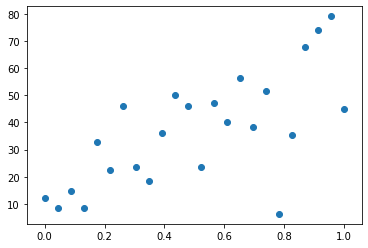

In [3]:
plt.scatter(x, y);

Пример решения для полинома второй степени:
$$y (x) = w_{0}+w_{1}x +w_{2}x^2$$ 

\begin{equation*}
\begin{vmatrix}
y_{1} \\
y_{2} \\
. \\
y_{N} \\
\end{vmatrix}=
\begin{vmatrix}
1 & x_{1} & x_{1}^{2}\\
1 & x_{2} & x_{2}^{2}\\
. & . & .\\
1 & x_{N} & x_{N}^{2}\\
\end{vmatrix}
\begin{vmatrix}
w_{0} \\
w_{1} \\
w_{2}
\end{vmatrix}
\end{equation*}

In [4]:
X = list(zip(np.ones(24), x, x*x))

In [5]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [6]:
W

array([12.1867    , 55.61441818, -9.10381818])

In [7]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x

In [8]:
f(x, W)

array([12.1867    , 14.5875087 , 16.95389842, 19.28586917, 21.58342095,
       23.84655375, 26.07526759, 28.26956245, 30.42943834, 32.55489526,
       34.6459332 , 36.70255217, 38.72475217, 40.7125332 , 42.66589526,
       44.58483834, 46.46936245, 48.31946759, 50.13515375, 51.91642095,
       53.66326917, 55.37569842, 57.0537087 , 58.6973    ])

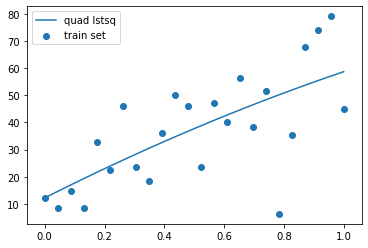

In [9]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
mean_squared_error(y, f(x, W))

212.5935367855731

## Задача 2

Данные: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset 

1. Разделите данные на train/test или используйте кросс-валидацию (можно grid search)

2. Постройте несколько моделей линейной регрессии:
- sklearn.linear_model.LinearRegression
- sklearn.linear_model.Ridge
- sklearn.linear_model.Lasso
- sklearn.linear_model.ElasticNet
3. Для последних трёх вариантов попробуйте разные значения коэффициента регуляризации.
4. Сравните построенные модели по MSE на тестовой выборке (или через кросс-валидацию)
5. Какая модель оказалась наилучшей? Почему?

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)